In [1]:
import tarfile

# Path to the tar.gz file
tar_file_path = 'lfw-funneled.tgz'

# Extract the tar file
with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(path='lfw_dataset')  # Specify your path here

In [2]:
import os
import numpy as np
from PIL import Image

# Path to the extracted dataset
dataset_path = 'lfw_dataset/lfw_funneled'

# Load images and convert to grayscale
images = []
for person_name in os.listdir(dataset_path):
    person_path = os.path.join(dataset_path, person_name)
    # Check if the path is a directory
    if os.path.isdir(person_path):
        for filename in os.listdir(person_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(person_path, filename)
                image = Image.open(image_path).convert('L')
                image = image.resize((62, 47))  # Resize to half the original size for computational ease
                images.append(np.array(image).flatten())  # Convert to 1D array

# Convert list to a numpy array
images = np.array(images)
print("Dataset shape:", images.shape)  # Should show (number_of_images, 2914)


Dataset shape: (13233, 2914)


In [3]:
from sklearn.decomposition import PCA

# Number of components
n_components = 9

# Create a PCA object
pca = PCA(n_components=n_components, whiten=True)

# Fit PCA on the image data
pca.fit(images)

# Get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, 47, 62))

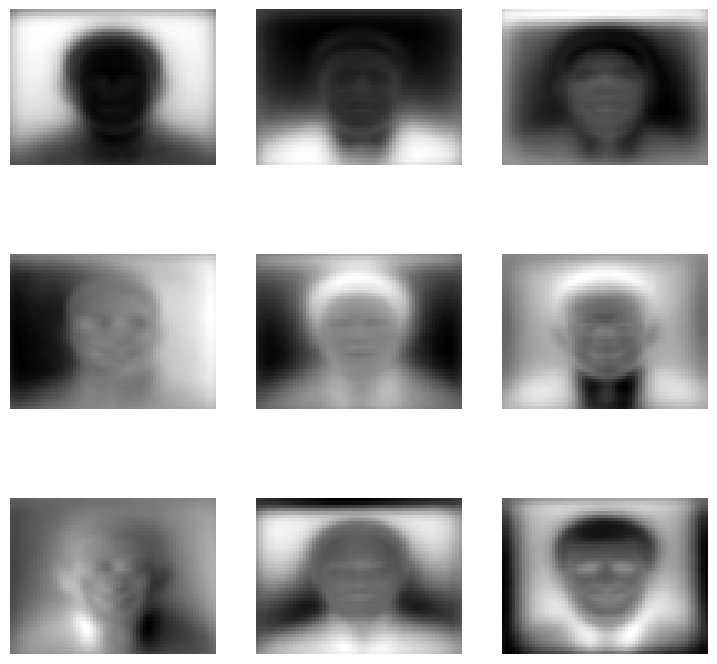

In [4]:
import matplotlib.pyplot as plt

# Plot the top 9 eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')

plt.show()

In [5]:
test_image = images[0]

In [6]:
# Project the image
image_projection = pca.transform(test_image.reshape(1, -1))

# Print the projection coefficients
print("Projection coefficients:", image_projection)

Projection coefficients: [[-1.41737263  1.65563138  0.27427768 -0.09315147 -0.06576833  0.81184241
   1.17085007 -0.98489457 -0.42053812]]


In [7]:
# Reconstruct the image from the PCA space
reconstructed_image = pca.inverse_transform(image_projection)

# Reshape the reconstructed image to the original shape (if needed)
reconstructed_image = reconstructed_image.reshape(47, 62)
# Ensure the original image is also reshaped to compare (if needed)
original_image = test_image.reshape(47, 62)

# Calculate the MSE
mse = ((original_image - reconstructed_image) ** 2).mean()

print("Mean Squared Error:", mse)


Mean Squared Error: 781.4879364528136
